In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('online_sales.csv')
df.head()

,device,visit_duration,made_purchase,purchase_total
0,mobile,0.72,1,20.27
1,tablet,8.13,1,66.57
2,desktop,8.60,1,67.14
3,desktop,13.06,1,62.16
4,mobile,3.76,0,0.00


## 1. Discrete probability distribution

In [3]:
df['made_purchase'].value_counts()

made_purchase
0    653
1    347
Name: count, dtype: int64

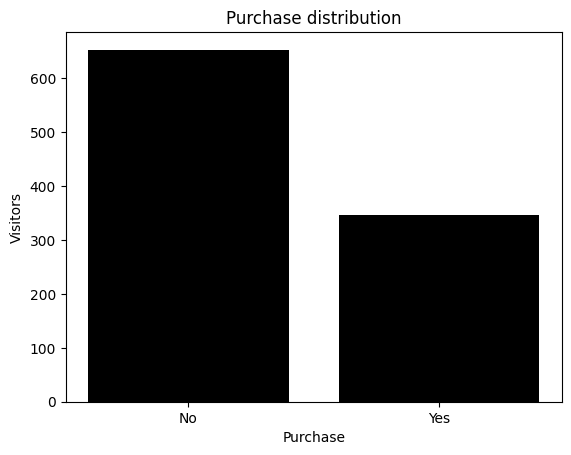

In [4]:
plt.title('Purchase distribution')

plt.bar(
    df['made_purchase'].value_counts().index,
    df['made_purchase'].value_counts(),
    color='black'
)

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Purchase')
plt.ylabel('Visitors')

plt.show()

In [5]:
df['made_purchase'].value_counts() / len(df)

made_purchase
0    0.653
1    0.347
Name: count, dtype: float64

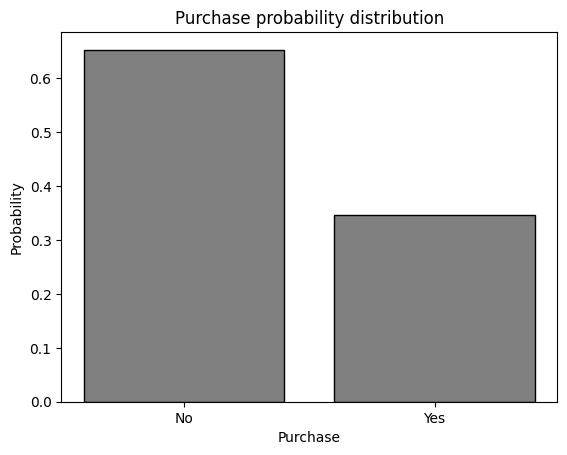

In [6]:
plt.title('Purchase probability distribution')

plt.bar(
    df['made_purchase'].value_counts().index,
    df['made_purchase'].value_counts() / len(df),
    color='grey',
    edgecolor='black'
)

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Purchase')
plt.ylabel('Probability')

plt.show()

## 2. Continuous probability distribution

In [7]:
purchase_df = df[df['purchase_total'] > 0]
purchase_df['purchase_total'].describe()

count    347.000000
mean      71.399539
std       54.224129
min        4.800000
25%       32.815000
50%       57.800000
75%       94.415000
max      286.600000
Name: purchase_total, dtype: float64

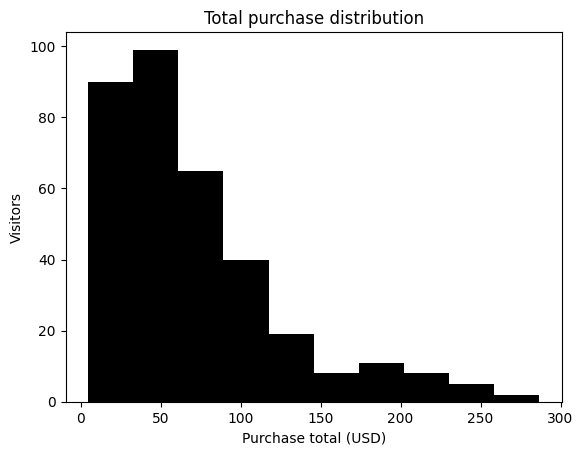

In [8]:
plt.title('Total purchase distribution')
plt.hist(purchase_df['purchase_total'], color='black')
plt.xlabel('Purchase total (USD)')
plt.ylabel('Visitors')
plt.show()

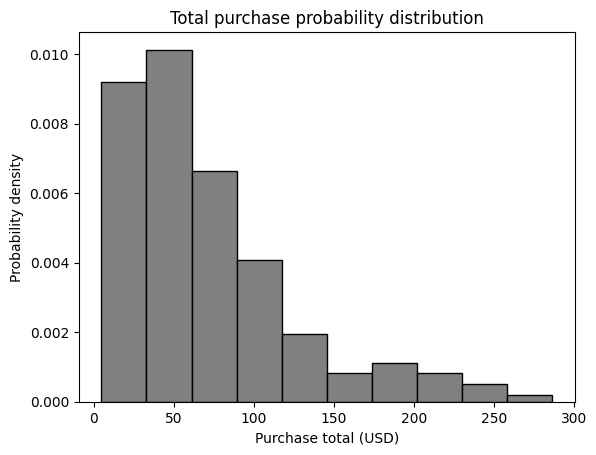

In [9]:
plt.title('Total purchase probability distribution')
plt.hist(purchase_df['purchase_total'], density=True, color='grey', edgecolor='black')
plt.xlabel('Purchase total (USD)')
plt.ylabel('Probability density')
plt.show()

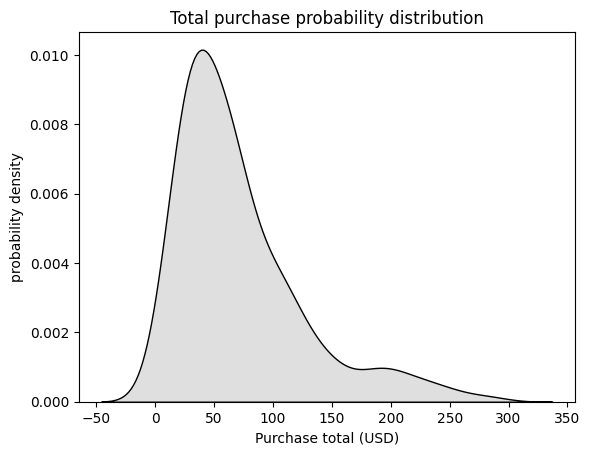

In [10]:
plt.title('Total purchase probability distribution')
sns.kdeplot(purchase_df['purchase_total'], fill=True, color='grey', edgecolor='black')
plt.xlabel('Purchase total (USD)')
plt.ylabel('probability density')
plt.show()

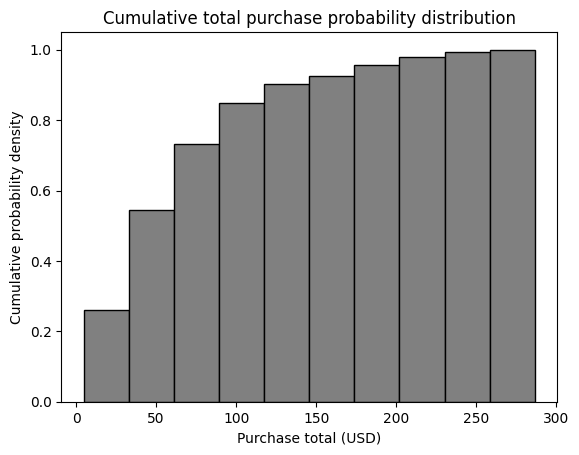

In [11]:
plt.title('Cumulative total purchase probability distribution')
plt.hist(purchase_df['purchase_total'], density=True, cumulative=True, color='grey', edgecolor='black')
plt.xlabel('Purchase total (USD)')
plt.ylabel('Cumulative probability density')
plt.show()

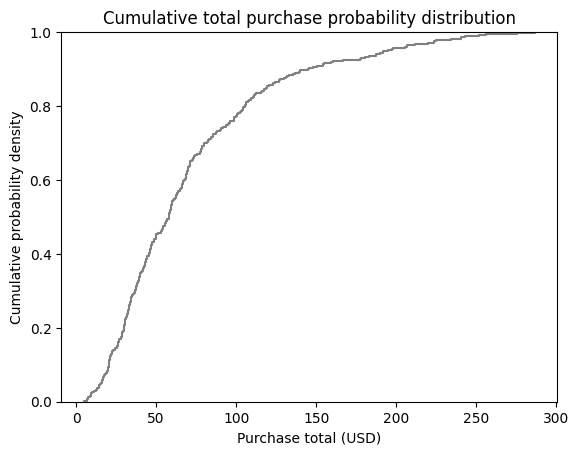

In [12]:
plt.title('Cumulative total purchase probability distribution')
sns.ecdfplot(purchase_df['purchase_total'], color='grey')
plt.xlabel('Purchase total (USD)')
plt.ylabel('Cumulative probability density')
plt.show()

## 3. Central limit theorem

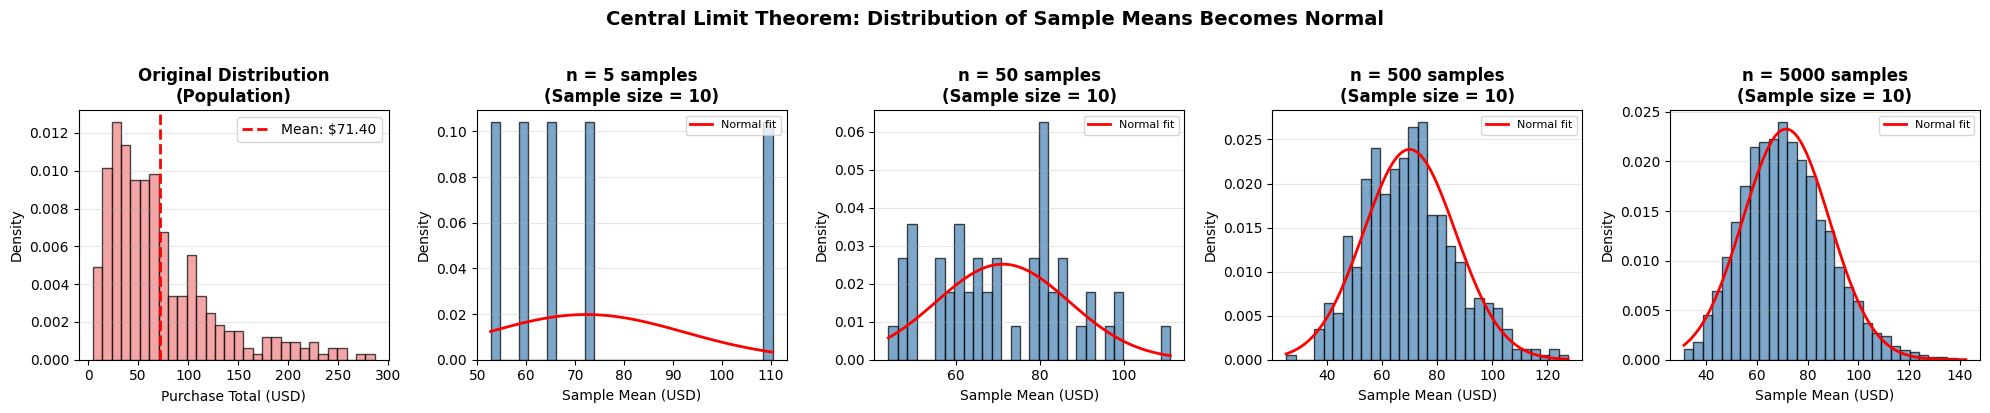

In [17]:
# Central Limit Theorem Demonstration
# Using purchase_total to show how sample means approach normal distribution

# Population statistics
population_mean = purchase_df['purchase_total'].mean()
population_std = purchase_df['purchase_total'].std()

# Create figure with 5 columns
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Column 1: Original distribution
axes[0].hist(purchase_df['purchase_total'], bins=30, color='lightcoral', 
             edgecolor='black', density=True, alpha=0.7)

axes[0].axvline(population_mean, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: ${population_mean:.2f}')

axes[0].set_title('Original Distribution\n(Population)', fontweight='bold')
axes[0].set_xlabel('Purchase Total (USD)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Columns 2-5: Sample mean distributions
n_samples_list = [5, 50, 500, 5000]
sample_size = 10

for idx, n_samples in enumerate(n_samples_list, start=1):
    # Draw many samples and calculate their means
    sample_means = []
    
    for _ in range(n_samples):
        sample = purchase_df['purchase_total'].sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())
    
    sample_means = np.array(sample_means)
    
    # Plot distribution of sample means
    axes[idx].hist(sample_means, bins=30, color='steelblue', edgecolor='black', 
                   density=True, alpha=0.7)
    
    # Overlay theoretical normal distribution
    mu = sample_means.mean()
    sigma = sample_means.std()
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    axes[idx].plot(x, stats.norm(mu, sigma).pdf(x), 'r-', linewidth=2, 
                   label='Normal fit')
    
    axes[idx].set_title(f'n = {n_samples} samples\n(Sample size = {sample_size})', 
                        fontweight='bold')
    axes[idx].set_xlabel('Sample Mean (USD)')
    axes[idx].set_ylabel('Density')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Central Limit Theorem: Distribution of Sample Means Becomes Normal', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()